<a href="https://colab.research.google.com/github/Sitaoooo/B20lab_sitao/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap

In [ ]:
class SVMClassifier:
    def __init__(self, kernel='linear', C=1.0, random_state=None, degree=None, gamma=None):
        self.model = SVC(kernel=kernel, C=C, random_state=random_state, degree=degree, gamma=gamma)

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def evaluate(self, y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        conf_matrix = confusion_matrix(y_true, y_pred)
        return accuracy, conf_matrix

    def plot_decision_boundary(self, X, y):
        h = .05
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        # Hint: you probably need to use np.meshgrid
        # you might also need to use np.arange to generate sequence
        # TODO: to finish Q2, fill the line below
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        Z = self.model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        colors = ['lightcoral', 'lightgreen']
        cmap = ListedColormap(colors)

        plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('SVM Decision Boundary')
        plt.show()

(569, 30)
Accuracy: 0.8903508771929824
Confusion Matrix:
[[ 69  14]
 [ 11 134]]


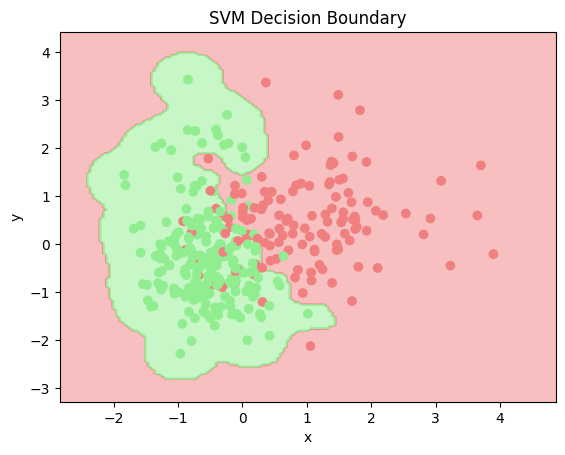

In [ ]:
if __name__ == "__main__":
    # load dataset
    breast_cancer = load_breast_cancer()
    print(breast_cancer.data.shape)
    X = breast_cancer.data[:, :2]  # Only use the first two features for easy visulization
    y = breast_cancer.target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Initialize and train the SVM classifier
    # try to use linear kernel, rbf kernel with different gamma values
    svm_classifier = SVMClassifier(kernel='rbf', degree=2, gamma=10 , C=1.0, random_state=0)
    svm_classifier.train(X_train, y_train)

    # Make predictions on the test set
    y_pred = svm_classifier.predict(X_test)

    # Evaluate the model
    accuracy, conf_matrix = svm_classifier.evaluate(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    print('Confusion Matrix:')
    print(conf_matrix)

    # Plot the decision boundary, uncomment below once you finish the plot function
    svm_classifier.plot_decision_boundary(X_train, y_train)

Q1. If you test gamma values 2, 5, 10, 20, 40, how would it affect the generalization/test performance? Why? You probably want to check [SVC offical doc](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

**answer**: a gamma value define how each training sample influences the decision boundary,a high gamma value means a training sample will only affect a small region, and decision boudary will wrapped tightly around the sample, too high a gamma will cause overfitting as decision boudary will be affected by noise lowering the test performance, whereas too low a gamma value cause underfitting, resulting in bad generalization.

Q2. Please complete the above plot_decision_boundary function to visualize the decision boundary. You might want to check out the meaning of plt.contourf function, np.meshgrid function, etc. Then uncomment the last line of the above code to visualize the decision boundary when gamma=5 and 40.